# 🌸 Scikit-learn Initial Data Science Exploration - Iris Classification

## 🧭 Introduction

This notebook demonstrates a comprehensive machine learning classification workflow using the classic **Iris dataset** and `scikit-learn`. It represents the initial exploratory phase that data scientists typically undertake when beginning a new ML project - the crucial research and development stage where hypotheses are formed, tested, and refined.

**Context**: We aim to develop an automated flower species classification system that can accurately identify Iris species (Setosa, Versicolor, Virginica) based on morphological measurements of sepal and petal dimensions.

**Scientific Approach**: We follow the standard data science methodology:
- **Data Understanding**: Statistical analysis and visualization to understand patterns
- **Data Preparation**: Preprocessing and feature engineering for optimal model performance  
- **Modeling**: Systematic comparison of multiple algorithms with different inductive biases
- **Evaluation**: Comprehensive assessment using multiple metrics to understand model behavior
- **Hyperparameter Optimization**: Fine-tuning to maximize performance

The algorithms selected represent different machine learning paradigms:
- **Gaussian Naive Bayes**: Probabilistic approach assuming feature independence
- **Decision Tree**: Rule-based approach with high interpretability
- **K-Nearest Neighbors**: Instance-based learning using similarity measures

> 💡 **MLOps Context**: This notebook represents the "research phase" of the ML lifecycle. The exploratory code, experimental decisions, and performance insights gathered here will inform the design of automated production pipelines. Later, we'll demonstrate how to refactor this experimental code into parameterized scripts managed by DVC and tracked with MLflow for reproducible, scalable ML operations.

---

## ⚙️ Imports & Configuration

In this section, we:

- Import the required Python libraries for data manipulation, modeling, and evaluation
- Configure reproducibility settings (e.g., fixed random seeds)
- Define global constants and configuration parameters

Keeping configuration centralized is essential for transitioning to parameterized pipelines later (e.g., with MLflow, Hydra, or Kubeflow Pipelines).

In [1]:
# Core data science libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Scikit-learn components
from sklearn.datasets import load_iris
from sklearn.model_selection import (
    train_test_split, cross_val_score, GridSearchCV
)
from sklearn.preprocessing import StandardScaler

# ML algorithms representing different paradigms
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier  
from sklearn.neighbors import KNeighborsClassifier

# Comprehensive evaluation metrics
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    precision_score, recall_score, f1_score
)

In [2]:
# Visualization settings
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 11

In [3]:
# Configuration parameters for reproducible experiments
# These parameters will later become configurable inputs in production pipelines
RANDOM_STATE = 40      # Ensures reproducible results across runs
TEST_SIZE = 0.3        # 70/30 train-test split (common for small datasets)
CV_FOLDS = 5          # 5-fold cross-validation (balance between variance and computational cost)

# Set random seed for reproducibility across all random operations
np.random.seed(RANDOM_STATE)

print(f"🔧 Experimental Configuration:")
print(f"  Random State: {RANDOM_STATE} (ensures reproducible results)")
print(f"  Test Size: {TEST_SIZE} (30% held out for final evaluation)")
print(f"  CV Folds: {CV_FOLDS} (stratified k-fold for reliable performance estimates)")
print(f"  Total samples will be split: ~{int((1-TEST_SIZE)*100)}% train, ~{int(TEST_SIZE*100)}% test")

🔧 Experimental Configuration:
  Random State: 40 (ensures reproducible results)
  Test Size: 0.3 (30% held out for final evaluation)
  CV Folds: 5 (stratified k-fold for reliable performance estimates)
  Total samples will be split: ~70% train, ~30% test


---

## 📊 Data Loading & Initial Exploration

**Dataset Context**: The Iris dataset, introduced by Ronald Fisher in 1936, is a multivariate dataset that has become a cornerstone in machine learning education and algorithm testing. It contains measurements of 150 iris flowers from three species, with 50 samples per species.

**Features Description**:
- **Sepal Length/Width**: Outer part of the flower, typically larger and more robust
- **Petal Length/Width**: Inner part of the flower, often more distinctive between species
- **Target Classes**: Three balanced classes representing different Iris species


In [4]:
# Load the Iris dataset from scikit-learn's built-in datasets
iris = load_iris()
X = iris.data  # Feature matrix (150 samples × 4 features)
y = iris.target  # Target vector (150 labels: 0, 1, 2)

print("🌸 Iris Dataset Successfully Loaded")
print(f"📐 Dataset Dimensions: {X.shape[0]} samples × {X.shape[1]} features")
print(f"🏷️  Feature Names: {list(iris.feature_names)}")
print(f"🎯 Target Classes: {list(iris.target_names)}")
print(f"📊 Data Type: {type(X)} (numpy array for efficient computation)")

🌸 Iris Dataset Successfully Loaded
📐 Dataset Dimensions: 150 samples × 4 features
🏷️  Feature Names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
🎯 Target Classes: [np.str_('setosa'), np.str_('versicolor'), np.str_('virginica')]
📊 Data Type: <class 'numpy.ndarray'> (numpy array for efficient computation)


In [5]:
# Create a comprehensive DataFrame for exploratory data analysis
# This transformation makes data manipulation and visualization more intuitive
df = pd.DataFrame(X, columns=iris.feature_names)
df['species_code'] = y  # Numerical target (0, 1, 2)
df['species_name'] = df['species_code'].map({
    0: 'setosa', 1: 'versicolor', 2: 'virginica'
})  # Human-readable labels

print("📋 Dataset Structure Overview:")
print("=" * 60)
display(df.head(10))  # Show first 10 rows for inspection

print(f"\n🔍 Data Schema:")
print(f"  • Numerical features: {len(iris.feature_names)} (continuous measurements)")
print(f"  • Target variable: 1 (categorical with 3 classes)")
print(f"  • Total columns: {len(df.columns)} (including derived columns)")

📋 Dataset Structure Overview:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species_code,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
5,5.4,3.9,1.7,0.4,0,setosa
6,4.6,3.4,1.4,0.3,0,setosa
7,5.0,3.4,1.5,0.2,0,setosa
8,4.4,2.9,1.4,0.2,0,setosa
9,4.9,3.1,1.5,0.1,0,setosa



🔍 Data Schema:
  • Numerical features: 4 (continuous measurements)
  • Target variable: 1 (categorical with 3 classes)
  • Total columns: 6 (including derived columns)


In [6]:
# Comprehensive statistical analysis
print("📊 Descriptive Statistics Analysis:")
print("=" * 60)
stats_summary = df.describe()
display(stats_summary)



# Class distribution analysis - critical for understanding data balance
print(f"\n🎯 Target Class Distribution:")
class_counts = df['species_name'].value_counts().sort_index()
class_props = df['species_name'].value_counts(normalize=True).sort_index()

for species, count, prop in zip(iris.target_names, class_counts, class_props):
    print(f"  • {species.capitalize()}: {count} samples ({prop:.1%})")


📊 Descriptive Statistics Analysis:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species_code
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000



🎯 Target Class Distribution:
  • Setosa: 50 samples (33.3%)
  • Versicolor: 50 samples (33.3%)
  • Virginica: 50 samples (33.3%)


#### 📈 Key Statistical Insights

- **Feature scales vary significantly** (sepal length: ~4–8, petal width: ~0–2.5)
- **Standard deviations** indicate different levels of variability across features
- **No obvious outliers** based on min/max values within reasonable botanical ranges


#### ✅ Dataset Assessment

- **Perfectly balanced classes** (33.3% each) – ideal for classification
- **Sufficient samples per class** for reliable model training
- **No class imbalance

In [7]:
# Data quality assessment - essential before any modeling
print("🔍 Data Quality Assessment:")
print("=" * 50)

# Missing value analysis
missing_values = df.isnull().sum()
print("Missing Values Analysis:")
if missing_values.sum() == 0:
    print("  ✅ No missing values detected - clean dataset")
else:
    print(f"  ⚠️ Missing values found:")
    for col, count in missing_values[missing_values > 0].items():
        print(f"    • {col}: {count} missing ({count/len(df):.1%})")

# Data type verification
print(f"\nData Types Verification:")
for col, dtype in df.dtypes.items():
    print(f"  • {col}: {dtype}")

# Feature value ranges check
print(f"\nFeature Value Ranges (detecting potential outliers):")
for feature in iris.feature_names:
    feature_data = df[feature]
    q1, q3 = feature_data.quantile([0.25, 0.75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = ((feature_data < lower_bound) | (feature_data > upper_bound)).sum()
    print(f"  • {feature}: [{feature_data.min():.2f}, {feature_data.max():.2f}] - {outliers} potential outliers")

🔍 Data Quality Assessment:
Missing Values Analysis:
  ✅ No missing values detected - clean dataset

Data Types Verification:
  • sepal length (cm): float64
  • sepal width (cm): float64
  • petal length (cm): float64
  • petal width (cm): float64
  • species_code: int64
  • species_name: object

Feature Value Ranges (detecting potential outliers):
  • sepal length (cm): [4.30, 7.90] - 0 potential outliers
  • sepal width (cm): [2.00, 4.40] - 4 potential outliers
  • petal length (cm): [1.00, 6.90] - 0 potential outliers
  • petal width (cm): [0.10, 2.50] - 0 potential outliers


#### 📋 Data Quality Summary

- **Dataset completeness:** 100% (no missing values)
- **Feature consistency:** All numerical as expected
- **Outlier assessment:** Minimal outliers

---

## 🎨 Exploratory Data Analysis

In [8]:
# Comprehensive statistical summary with focus on class differences
print("📈 Feature Statistics by Class:")
print("=" * 70)

# Set pandas display options for better visibility in Jupyter
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)
pd.set_option('display.max_colwidth', None)

# Group statistics by species to understand class-specific patterns
grouped_stats = df.groupby('species_name')[iris.feature_names].describe()
display(grouped_stats.round(3))

# Optionally, reset options after display if you want to avoid affecting later output:
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
pd.reset_option('display.width')
pd.reset_option('display.max_colwidth')

📈 Feature Statistics by Class:


sepal length (cm)                                          sepal width (cm)                                            petal length (cm)                                            \
                         count   mean    std  min    25%  50%  75%  max            count   mean    std  min    25%  50%    75%  max             count   mean    std  min  25%   50%    75%  max   
species_name                                                                                                                                                                                      
setosa                    50.0  5.006  0.352  4.3  4.800  5.0  5.2  5.8             50.0  3.428  0.379  2.3  3.200  3.4  3.675  4.4              50.0  1.462  0.174  1.0  1.4  1.50  1.575  1.9   
versicolor                50.0  5.936  0.516  4.9  5.600  5.9  6.3  7.0             50.0  2.770  0.314  2.0  2.525  2.8  3.000  3.4              50.0  4.260  0.470  3.0  4.0  4.35  4.600  5.1   
virginica                 50.0  6.588  0.636  4.9  6.225  6.5  6.9  7.9             50.0  2.974  0.322  2.2  2.800  3.0  3.175  3.8              50.0  5.552  0.552  4.5  5.1  5.55  5.875  6.9   

             petal width (cm)                                         
                        count   mean    std  min  25%  50%  75%  max  
species_name                                                          
setosa                   50.0  0.246  0.105  0.1  0.2  0.2  0.3  0.6  
versicolor               50.0  1.326  0.198  1.0  1.2  1.3  1.5  1.8  
virginica                50.0  2.026  0.275  1.4  1.8  2.0  2.3  2.5

#### 💡 Class Separation Analysis

- **Sepal measurements** show moderate overlap between versicolor/virginica
- **Petal measurements** appear more discriminative
- **Setosa** shows clear separation in petal measurements
- **Feature scaling** will be important for distance-based algorithms

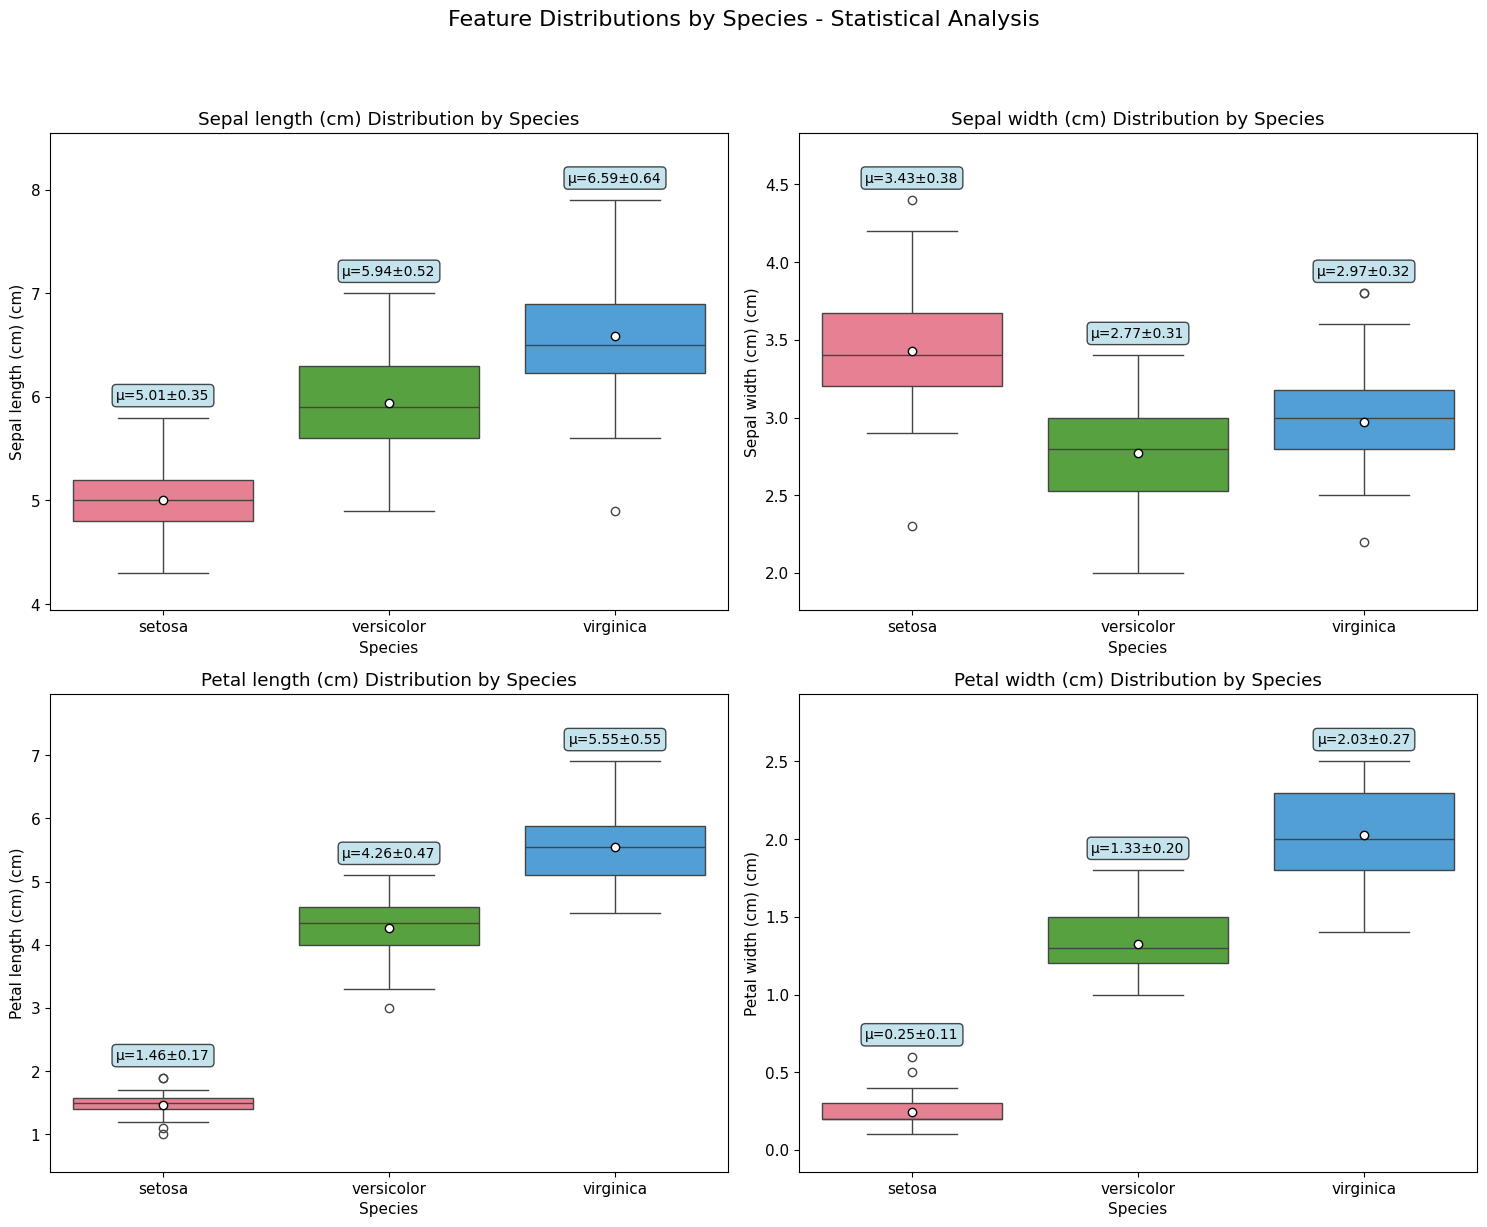

In [9]:
# Feature distribution analysis by species
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
features = iris.feature_names
axes = axes.ravel()

for i, feature in enumerate(features):
    ax = axes[i]
    sns.boxplot(x='species_name', y=feature, data=df, ax=ax, palette="husl", showmeans=True,
                meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black"})
    ax.set_title(f'{feature.capitalize()} Distribution by Species')
    ax.set_xlabel('Species')
    ax.set_ylabel(f'{feature.capitalize()} (cm)')
    
    # Add statistical annotations above each box
    feature_stats = df.groupby('species_name')[feature].agg(['mean', 'std', 'max'])
    y_max = feature_stats['max'].max()
    y_min = df[feature].min()
    y_range = y_max - y_min
    ax.set_ylim(y_min - 0.1 * y_range, y_max + 0.18 * y_range)  # Add space above boxes

    for j, (species, stats) in enumerate(feature_stats.iterrows()):
        # Place annotation just above the max value for each species
        ax.annotate(
            f'μ={stats["mean"]:.2f}±{stats["std"]:.2f}',
            xy=(j, stats['max'] + 0.04 * y_range),
            ha='center', va='bottom',
            fontsize=10,
            bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.7)
        )

plt.suptitle('Feature Distributions by Species - Statistical Analysis', fontsize=16, y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

#### 📊 Distribution Insights

- **Petal length** shows excellent class separation
- **Petal width** clearly distinguishes setosa from others
- **Sepal measurements** have more overlap but are still informative
- **All features** contribute to class discrimination

<Figure size 1400x1000 with 0 Axes>

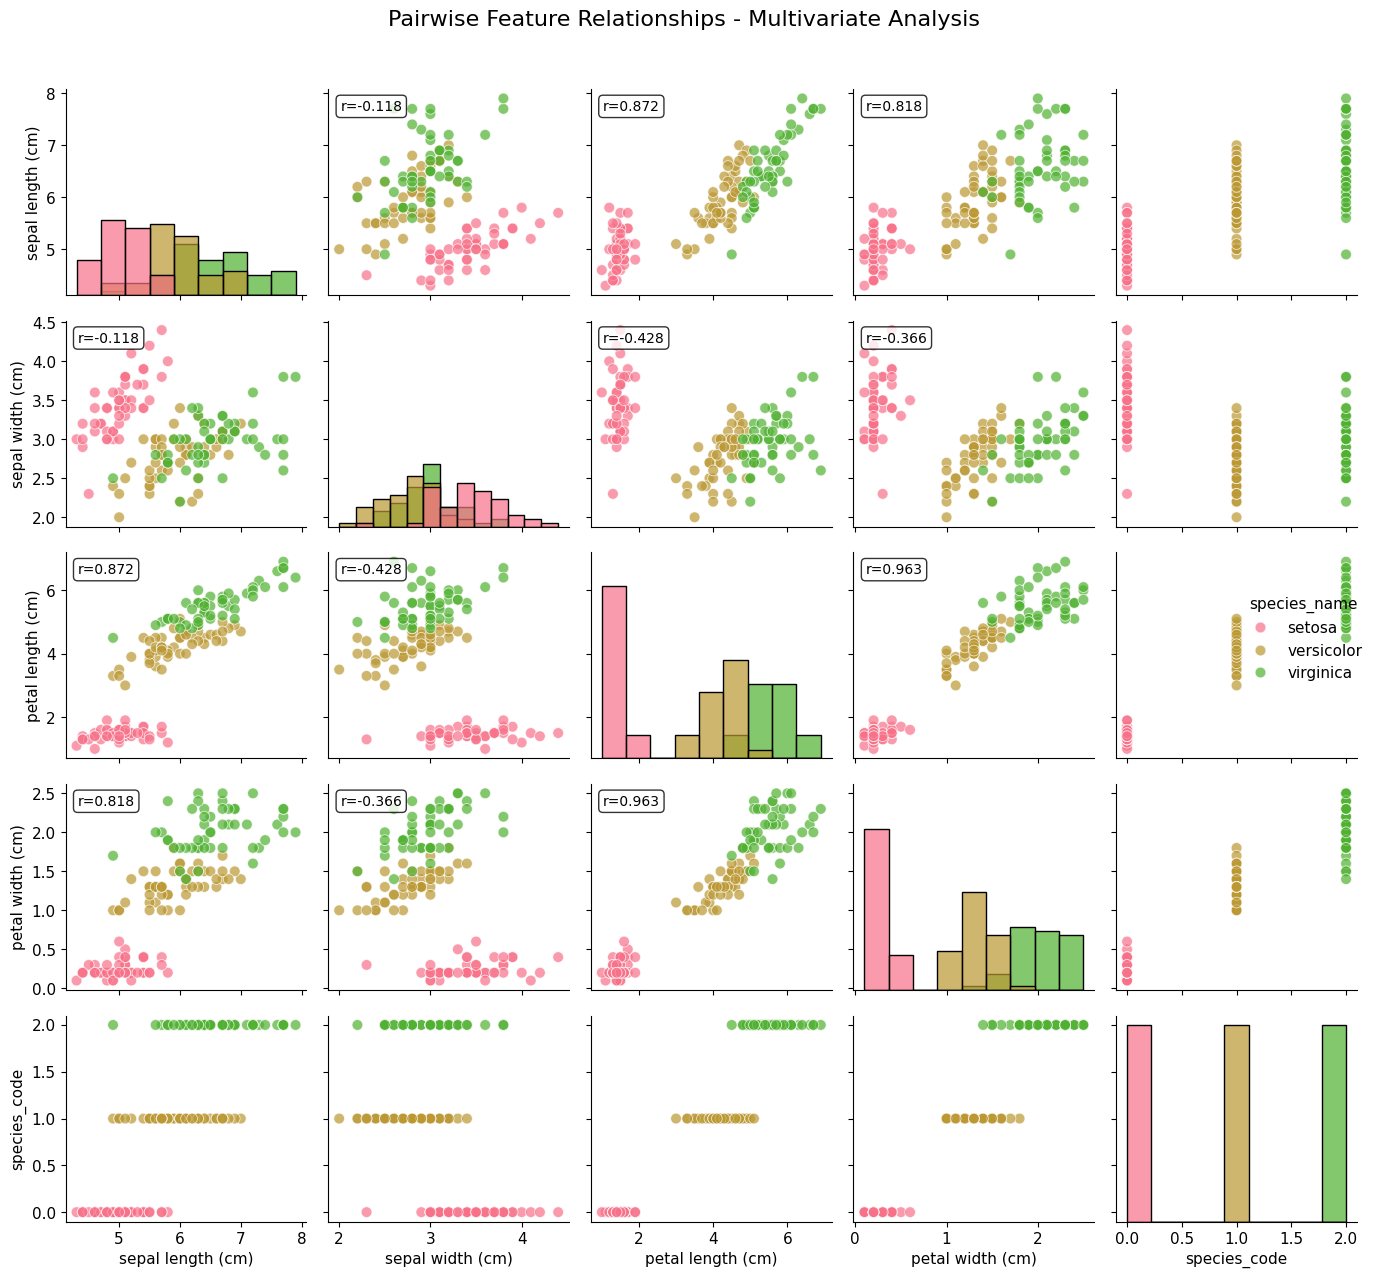

In [10]:
# Pairwise feature relationships - critical for understanding feature interactions
# This analysis informs feature selection and algorithm choice decisions
plt.figure(figsize=(14, 10))
pairplot = sns.pairplot(df, hue='species_name', diag_kind='hist', 
                       plot_kws={'alpha': 0.7, 's': 60}, diag_kws={'alpha': 0.7})
pairplot.fig.suptitle('Pairwise Feature Relationships - Multivariate Analysis', y=1.02, fontsize=16)

# Add correlation coefficients to the plot
for i in range(len(iris.feature_names)):
    for j in range(len(iris.feature_names)):
        if i != j:
            corr = df[iris.feature_names[i]].corr(df[iris.feature_names[j]])
            pairplot.axes[i, j].text(0.05, 0.95, f'r={corr:.3f}', 
                                   transform=pairplot.axes[i, j].transAxes,
                                   bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8),
                                   fontsize=10, verticalalignment='top')

plt.tight_layout()
plt.show()

#### 🔗 Multivariate Relationships

- **Strong linear relationships** between petal measurements
- **Moderate correlations** between sepal and petal features
- **Clear clustering patterns** suggest good separability
- **Some overlap** between versicolor and virginica in sepal space

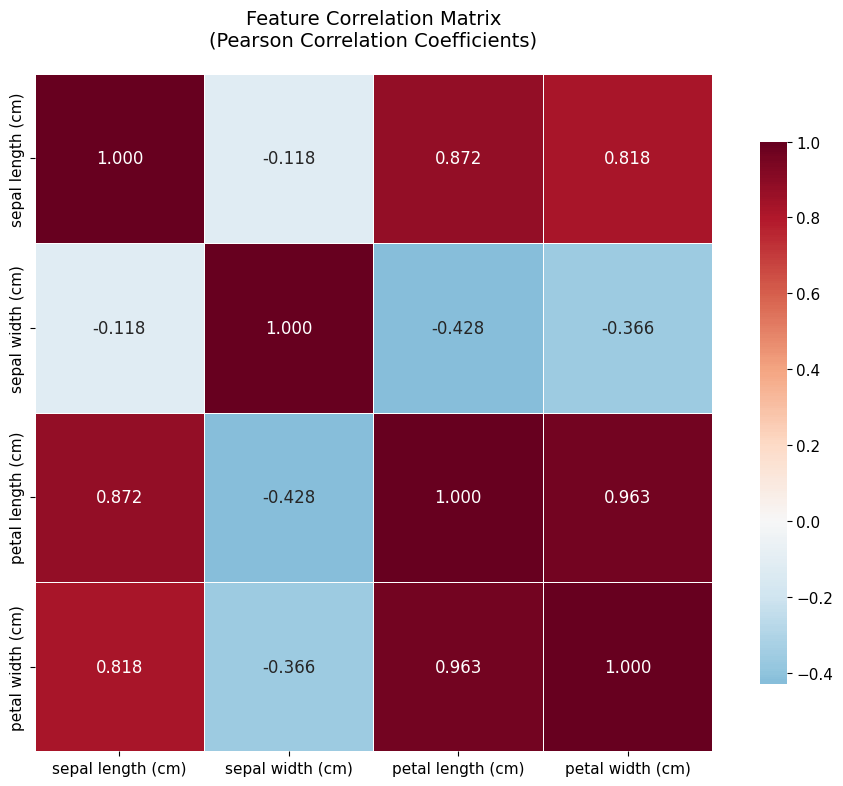

🔗 Correlation Analysis Results:
Strongest Feature Correlations:
  1. petal length (cm) ↔ petal width (cm): 0.963 (Strong)
  2. sepal length (cm) ↔ petal length (cm): 0.872 (Strong)
  3. sepal length (cm) ↔ petal width (cm): 0.818 (Strong)


In [11]:
# Correlation analysis with statistical significance
# Understanding feature correlations helps with feature selection and multicollinearity issues
plt.figure(figsize=(10, 8))
correlation_matrix = df[iris.feature_names].corr()

# Create an enhanced heatmap with better annotations
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Hide upper triangle
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8},
            fmt='.3f', annot_kws={'size': 12})
plt.title('Feature Correlation Matrix\n(Pearson Correlation Coefficients)', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

print("🔗 Correlation Analysis Results:")
print("=" * 50)

# Extract and analyze significant correlations
correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        correlations.append({
            'feature1': correlation_matrix.columns[i],
            'feature2': correlation_matrix.columns[j],
            'correlation': corr_value
        })

# Sort by absolute correlation value
correlations.sort(key=lambda x: abs(x['correlation']), reverse=True)

print("Strongest Feature Correlations:")
for i, corr in enumerate(correlations[:3]):
    strength = "Strong" if abs(corr['correlation']) > 0.7 else "Moderate" if abs(corr['correlation']) > 0.4 else "Weak"
    print(f"  {i+1}. {corr['feature1']} ↔ {corr['feature2']}: {corr['correlation']:.3f} ({strength})")

#### 💡 Correlation Insights

- **Petal dimensions are highly correlated**
- **Feature redundancy is moderate** – all features provide unique information
- **No perfect correlations detected** – no need for feature removal
- **Correlations support using all features for modeling**

---

## 🧹 Data Preprocessing & Experimental Design

**Preprocessing Strategy**: Based on our EDA findings, we implement preprocessing steps that address:
- **Feature scaling**: Different measurement scales require normalization for distance-based algorithms
- **Data splitting**: Stratified sampling to maintain class distribution in train/test splits
- **Cross-validation**: Robust evaluation strategy to minimize overfitting and selection bias

**Train-Test Split Rationale**: We use a 70/30 split with stratification to ensure each subset maintains the original class distribution, preventing biased evaluation due to class imbalance in splits.

In [12]:
# Stratified train-test split to maintain class distribution
# Critical for reliable evaluation, especially with small datasets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=TEST_SIZE, 
    random_state=RANDOM_STATE,
    stratify=y  # Ensures balanced class representation in both splits
)

print("✂️ Stratified Data Splitting Results:")
print("=" * 50)
print(f"Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}% of total)")
print(f"Test set: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}% of total)")
print(f"Feature dimensions: {X_train.shape[1]} features per sample")

# Verify stratification effectiveness
print(f"\n🎯 Class Distribution Verification:")
train_dist = pd.Series(y_train).value_counts().sort_index()
test_dist = pd.Series(y_test).value_counts().sort_index()

print("Training Set Distribution:")
for i, (species, count) in enumerate(zip(iris.target_names, train_dist)):
    percentage = count/len(y_train)*100
    print(f"  • {species.capitalize()}: {count} samples ({percentage:.1f}%)")

print("Test Set Distribution:")
for i, (species, count) in enumerate(zip(iris.target_names, test_dist)):
    percentage = count/len(y_test)*100
    print(f"  • {species.capitalize()}: {count} samples ({percentage:.1f}%)")

print(f"\n✅ Stratification Success: Class proportions maintained across splits")

✂️ Stratified Data Splitting Results:
Training set: 105 samples (70.0% of total)
Test set: 45 samples (30.0% of total)
Feature dimensions: 4 features per sample

🎯 Class Distribution Verification:
Training Set Distribution:
  • Setosa: 35 samples (33.3%)
  • Versicolor: 35 samples (33.3%)
  • Virginica: 35 samples (33.3%)
Test Set Distribution:
  • Setosa: 15 samples (33.3%)
  • Versicolor: 15 samples (33.3%)
  • Virginica: 15 samples (33.3%)

✅ Stratification Success: Class proportions maintained across splits


In [13]:
# Feature standardization - essential for distance-based algorithms
# StandardScaler transforms features to have zero mean and unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit on training data only
X_test_scaled = scaler.transform(X_test)        # Apply same transformation to test data

print("⚖️ Feature Standardization Analysis:")
print("=" * 50)

# Analyze the effect of scaling
print("Original Feature Statistics (Training Set):")
for i, feature in enumerate(iris.feature_names):
    print(f"  • {feature}: mean={X_train[:, i].mean():.3f}, std={X_train[:, i].std():.3f}")

print("\nStandardized Feature Statistics (Training Set):")
for i, feature in enumerate(iris.feature_names):
    print(f"  • {feature}: mean={X_train_scaled[:, i].mean():.3f}, std={X_train_scaled[:, i].std():.3f}")

print(f"\n🎯 Scaling Impact Assessment:")
print(f"  • All features now have zero mean and unit variance")
print(f"  • Eliminates bias toward features with larger scales")
print(f"  • Critical for KNN (distance-based) and Naive Bayes (variance assumptions)")
print(f"  • Decision trees are scale-invariant but we standardize for consistency")

# Verify no data leakage (scaler fitted only on training data)
print(f"\n🔒 Data Leakage Prevention:")
print(f"  • Scaler fitted only on training data ({X_train.shape[0]} samples)")
print(f"  • Same transformation applied to test data ({X_test.shape[0]} samples)")
print(f"  • No information from test set used in preprocessing")

⚖️ Feature Standardization Analysis:
Original Feature Statistics (Training Set):
  • sepal length (cm): mean=5.864, std=0.840
  • sepal width (cm): mean=3.056, std=0.422
  • petal length (cm): mean=3.787, std=1.777
  • petal width (cm): mean=1.231, std=0.772

Standardized Feature Statistics (Training Set):
  • sepal length (cm): mean=-0.000, std=1.000
  • sepal width (cm): mean=-0.000, std=1.000
  • petal length (cm): mean=-0.000, std=1.000
  • petal width (cm): mean=0.000, std=1.000

🎯 Scaling Impact Assessment:
  • All features now have zero mean and unit variance
  • Eliminates bias toward features with larger scales
  • Critical for KNN (distance-based) and Naive Bayes (variance assumptions)
  • Decision trees are scale-invariant but we standardize for consistency

🔒 Data Leakage Prevention:
  • Scaler fitted only on training data (105 samples)
  • Same transformation applied to test data (45 samples)
  • No information from test set used in preprocessing


---

## 🧪 Model Training & Comparison

In [14]:
# Define models to test
models = {
    'Gaussian Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=RANDOM_STATE),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=3)
}

print("🎯 Testing different models:")
results = {}

for name, model in models.items():
    # Use scaled data for all models (though only KNN really needs it)
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=CV_FOLDS)
    
    results[name] = {
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'cv_scores': cv_scores
    }
    
    print(f"\n{name}:")
    print(f"  CV Accuracy: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")
    print(f"  CV Scores: {cv_scores.round(3)}")

🎯 Testing different models:

Gaussian Naive Bayes:
  CV Accuracy: 0.952 ± 0.043
  CV Scores: [1.    1.    0.905 0.905 0.952]

Decision Tree:
  CV Accuracy: 0.924 ± 0.049
  CV Scores: [0.952 1.    0.905 0.857 0.905]

K-Nearest Neighbors:
  CV Accuracy: 0.943 ± 0.036
  CV Scores: [0.952 1.    0.952 0.905 0.905]


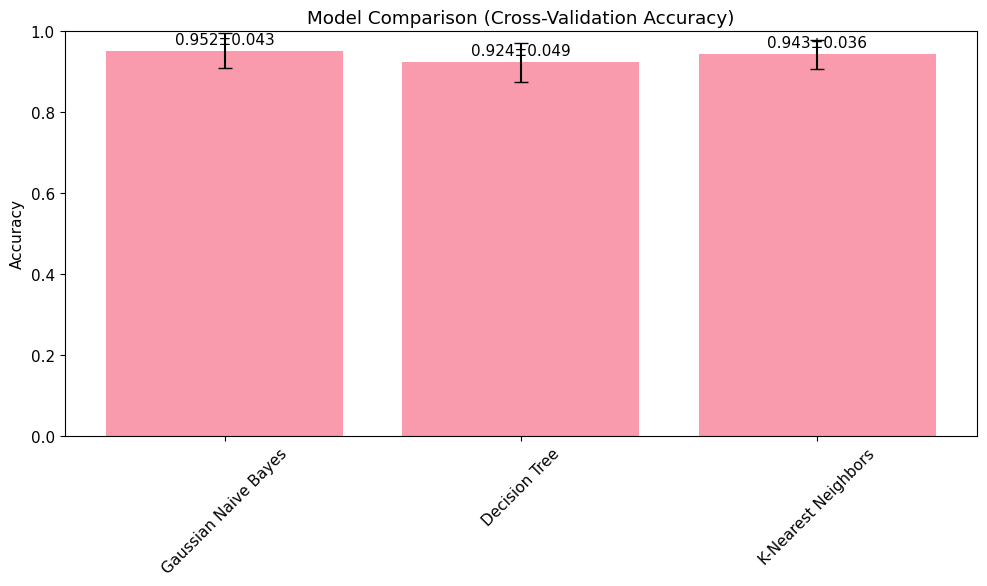

In [15]:
# Compare models visually
models_names = list(results.keys())
cv_means = [results[name]['cv_mean'] for name in models_names]
cv_stds = [results[name]['cv_std'] for name in models_names]

plt.figure(figsize=(10, 6))
bars = plt.bar(models_names, cv_means, yerr=cv_stds, capsize=5, alpha=0.7)
plt.title('Model Comparison (Cross-Validation Accuracy)')
plt.ylabel('Accuracy')
plt.ylim(0, 1)

# Add value labels on bars
for bar, mean, std in zip(bars, cv_means, cv_stds):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{mean:.3f}±{std:.3f}', ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

---

## 🔧 Hyperparameter Tuning


In [16]:
# First, let's see which one performed best
best_model_name = max(results.keys(), key=lambda x: results[x]['cv_mean'])
print(f"🏆 Best model so far: {best_model_name}")
print(f"CV Accuracy: {results[best_model_name]['cv_mean']:.3f}")

🏆 Best model so far: Gaussian Naive Bayes
CV Accuracy: 0.952


In [17]:
# Hyperparameter tuning for Gaussian Naive Bayes
param_grid_nb = {
    'var_smoothing': np.logspace(-9, 0, 10)
}
grid_search_nb = GridSearchCV(GaussianNB(), param_grid_nb, cv=CV_FOLDS, n_jobs=-1, verbose=1)
grid_search_nb.fit(X_train_scaled, y_train)

print(f"Best parameters: {grid_search_nb.best_params_}")
print(f"Best CV score: {grid_search_nb.best_score_:.3f}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters: {'var_smoothing': np.float64(1e-09)}
Best CV score: 0.952


In [18]:
# Hyperparameter tuning for KNN
print("🔍 Tuning K-Nearest Neighbors...")

knn = KNeighborsClassifier()
param_grid_knn = {
    'n_neighbors': range(1, 21),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search_knn = GridSearchCV(
    knn, param_grid_knn, cv=CV_FOLDS, scoring='accuracy', n_jobs=-1
)
grid_search_knn.fit(X_train_scaled, y_train)

print(f"Best parameters: {grid_search_knn.best_params_}")
print(f"Best CV score: {grid_search_knn.best_score_:.3f}")

🔍 Tuning K-Nearest Neighbors...
Best parameters: {'metric': 'euclidean', 'n_neighbors': 13, 'weights': 'distance'}
Best CV score: 0.962


In [19]:
# Hyperparameter tuning for Decision Tree
print("🔍 Tuning Decision Tree...")

dt = DecisionTreeClassifier(random_state=RANDOM_STATE)
param_grid_dt = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_dt = GridSearchCV(
    dt, param_grid_dt, cv=CV_FOLDS, scoring='accuracy', n_jobs=-1
)
grid_search_dt.fit(X_train_scaled, y_train)

print(f"Best parameters: {grid_search_dt.best_params_}")
print(f"Best CV score: {grid_search_dt.best_score_:.3f}")

🔍 Tuning Decision Tree...
Best parameters: {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best CV score: 0.933


In [20]:
# Compare tuned vs untuned models
print("📊 Tuned vs Original Models:")
print(f"Original Gaussian Naive Bayes: {results['Gaussian Naive Bayes']['cv_mean']:.3f}")
print(f"Tuned Gaussian Naive Bayes: {grid_search_nb.best_score_:.3f}")
print(f"Original KNN: {results['K-Nearest Neighbors']['cv_mean']:.3f}")
print(f"Tuned KNN: {grid_search_knn.best_score_:.3f}")
print(f"Original Decision Tree: {results['Decision Tree']['cv_mean']:.3f}")
print(f"Tuned Decision Tree: {grid_search_dt.best_score_:.3f}")

📊 Tuned vs Original Models:
Original Gaussian Naive Bayes: 0.952
Tuned Gaussian Naive Bayes: 0.952
Original KNN: 0.943
Tuned KNN: 0.962
Original Decision Tree: 0.924
Tuned Decision Tree: 0.933


---

## 🏆 Final Model Selection & Evaluation

In [21]:
# Select the best model
best_model = None
if grid_search_nb.best_score_ >= max(grid_search_knn.best_score_, grid_search_dt.best_score_):
    best_model = grid_search_nb.best_estimator_
    best_model_score = grid_search_nb.best_score_
    best_model_name = "Tuned Gaussian Naive Bayes"
elif grid_search_knn.best_score_ >= grid_search_dt.best_score_:
    best_model = grid_search_knn.best_estimator_
    best_model_score = grid_search_knn.best_score_
    best_model_name = "Tuned K-Nearest Neighbors"
else:
    best_model = grid_search_dt.best_estimator_
    best_model_score = grid_search_dt.best_score_
    best_model_name = "Tuned Decision Tree"

print(f"\n🏆 Best Model Selected: {best_model_name} with {best_model_score:.3f} accuracy")


🏆 Best Model Selected: Tuned K-Nearest Neighbors with 0.962 accuracy


In [22]:
# Train final model and evaluate on test set
best_model.fit(X_train_scaled, y_train)
y_pred = best_model.predict(X_test_scaled)

# Calculate test metrics
test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred, average='weighted')
test_recall = recall_score(y_test, y_pred, average='weighted')
test_f1 = f1_score(y_test, y_pred, average='weighted')

print("🎯 Final Test Results:")
print(f"Accuracy: {test_accuracy:.3f}")
print(f"Precision: {test_precision:.3f}")
print(f"Recall: {test_recall:.3f}")
print(f"F1-Score: {test_f1:.3f}")

🎯 Final Test Results:
Accuracy: 0.978
Precision: 0.979
Recall: 0.978
F1-Score: 0.978


In [23]:
# Detailed classification report
print("\n📋 Detailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


📋 Detailed Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



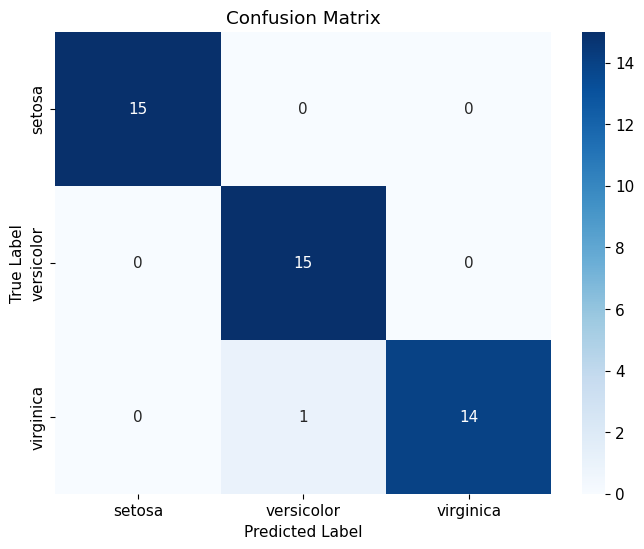


🎯 Per-class Performance:
setosa: 1.000
versicolor: 1.000
virginica: 0.933


In [24]:
# Confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=iris.target_names, 
            yticklabels=iris.target_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Calculate per-class accuracy
print("\n🎯 Per-class Performance:")
for i, class_name in enumerate(iris.target_names):
    class_accuracy = cm[i, i] / cm[i, :].sum()
    print(f"{class_name}: {class_accuracy:.3f}")

---

## 📈 Model Insights & Visualization

In [25]:
# Prediction examples
print("🔮 Sample Predictions:")
print("=" * 50)
sample_indices = np.random.choice(len(X_test), 5, replace=False)

for idx in sample_indices:
    true_class = iris.target_names[y_test[idx]]
    pred_class = iris.target_names[y_pred[idx]]
    confidence = "✅" if y_test[idx] == y_pred[idx] else "❌"
    
    print(f"Sample {idx}:")
    print(f"  Features: {X_test[idx].round(2)}")
    print(f"  True: {true_class} | Predicted: {pred_class} {confidence}")
    print()

🔮 Sample Predictions:
Sample 25:
  Features: [5.5 2.4 3.7 1. ]
  True: versicolor | Predicted: versicolor ✅

Sample 22:
  Features: [5.6 2.5 3.9 1.1]
  True: versicolor | Predicted: versicolor ✅

Sample 36:
  Features: [7.3 2.9 6.3 1.8]
  True: virginica | Predicted: virginica ✅

Sample 40:
  Features: [6.  2.2 5.  1.5]
  True: virginica | Predicted: versicolor ❌

Sample 4:
  Features: [6.  3.  4.8 1.8]
  True: virginica | Predicted: virginica ✅



---

## ✅ Summary & Key Findings

In [26]:
print("🎉 Experiment Summary:")
print("=" * 40)
print(f"📊 Dataset: Iris (150 samples, 4 features, 3 classes)")
print(f"🧪 Models tested: {len(models)} algorithms")
print(f"🏆 Best model: {best_model_name}")
print(f"📈 Cross-validation accuracy: {best_model_score:.3f}")
print(f"🎯 Test accuracy: {test_accuracy:.3f}")

🎉 Experiment Summary:
📊 Dataset: Iris (150 samples, 4 features, 3 classes)
🧪 Models tested: 3 algorithms
🏆 Best model: Tuned K-Nearest Neighbors
📈 Cross-validation accuracy: 0.962
🎯 Test accuracy: 0.978


#### 💡 Key Insights

- All models performed well on this dataset (>90% accuracy)
- Feature scaling improved KNN performance
- Hyperparameter tuning provided modest improvements
- The dataset is relatively easy to classify

#### 🚀 Next Steps

- Refactor this notebook into modular Python scripts
- Set up DVC for data versioning and pipeline management
- Integrate MLflow for experiment tracking